# K-Nearest Neighbors

## Importing the basic libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

## Importing dataset

In [2]:
data = pd.read_csv('titanic.csv')

### Analyze data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.shape

(891, 12)

### Visualizing the data

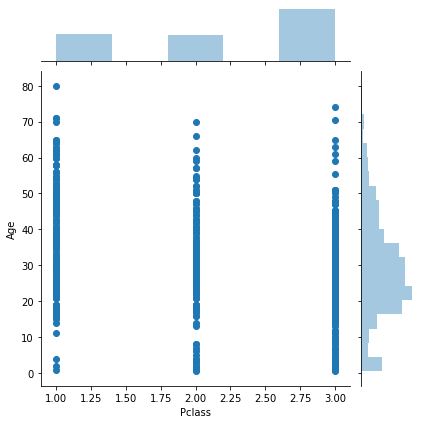

In [9]:
sns.jointplot(x='Pclass',y='Age',data=data)

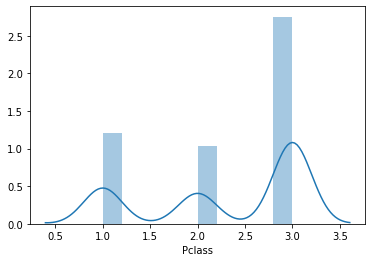

In [10]:
sns.distplot(data['Pclass'])

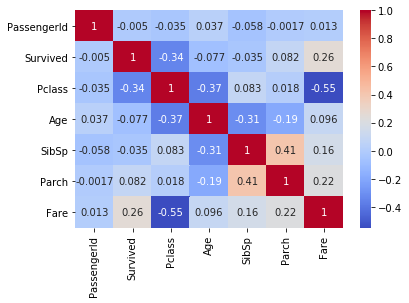

In [11]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

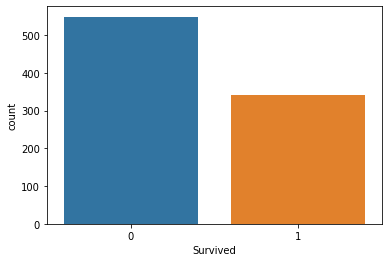

In [12]:
sns.countplot(data['Survived'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


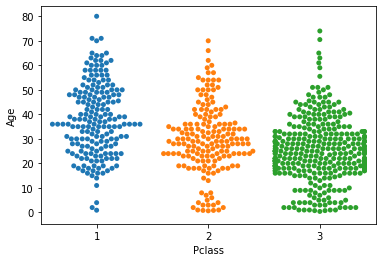

In [13]:
sns.swarmplot(x='Pclass',y='Age',data=data)

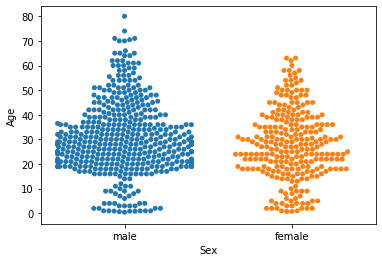

In [14]:
sns.swarmplot(x='Sex',y='Age',data=data)

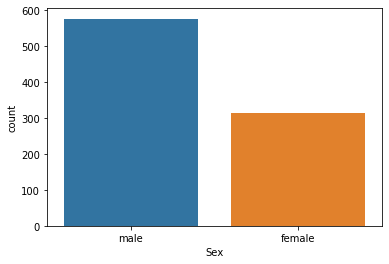

In [15]:
sns.countplot(data['Sex'])

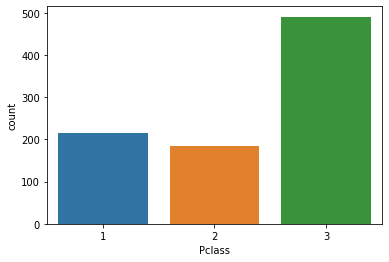

In [16]:
sns.countplot(data['Pclass'])

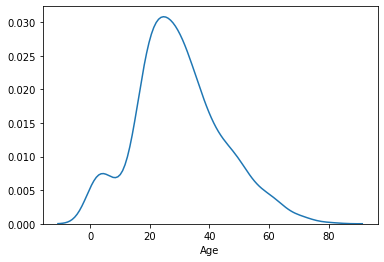

In [17]:
sns.distplot(data['Age'],hist=False)

### Cleaning data

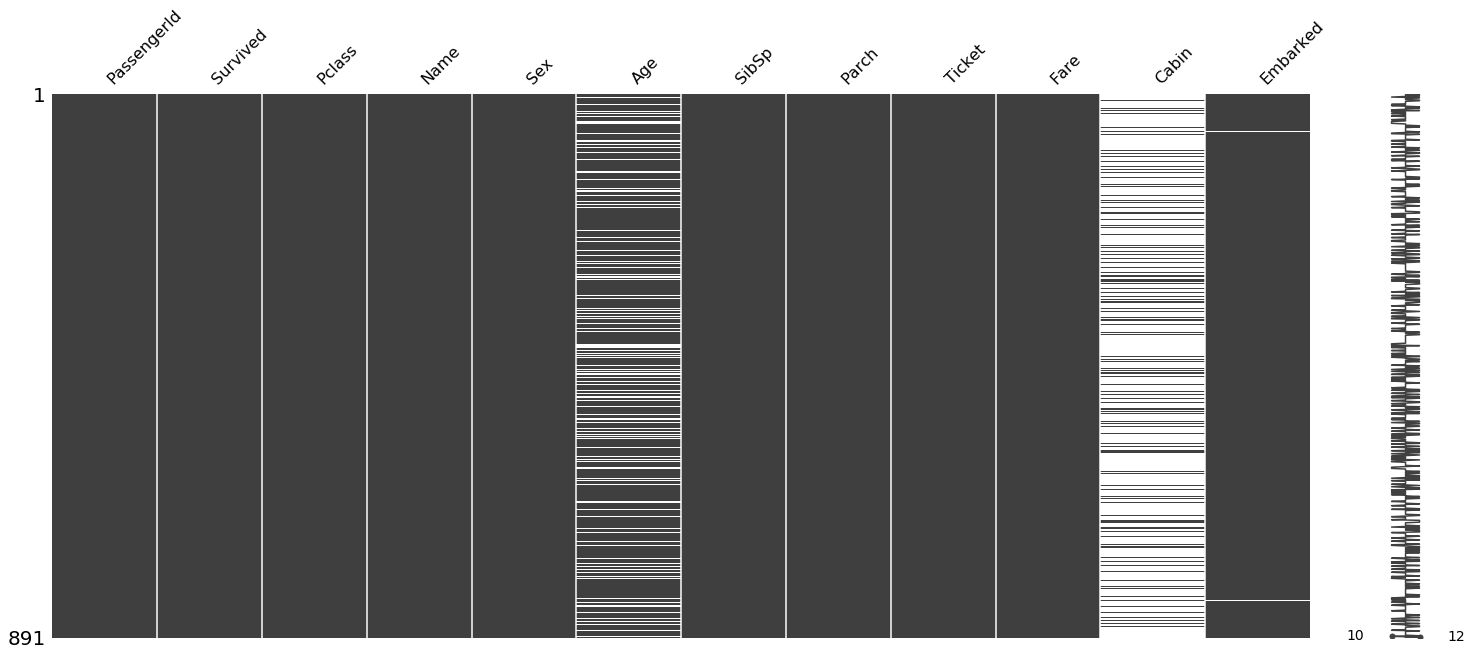

In [18]:
ms.matrix(data)

In [19]:
dataset = data.copy()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
data = data.drop('Name',axis=1)

In [22]:
data = data.drop('Ticket',axis=1)

In [23]:
data = data.drop('Cabin',axis=1)

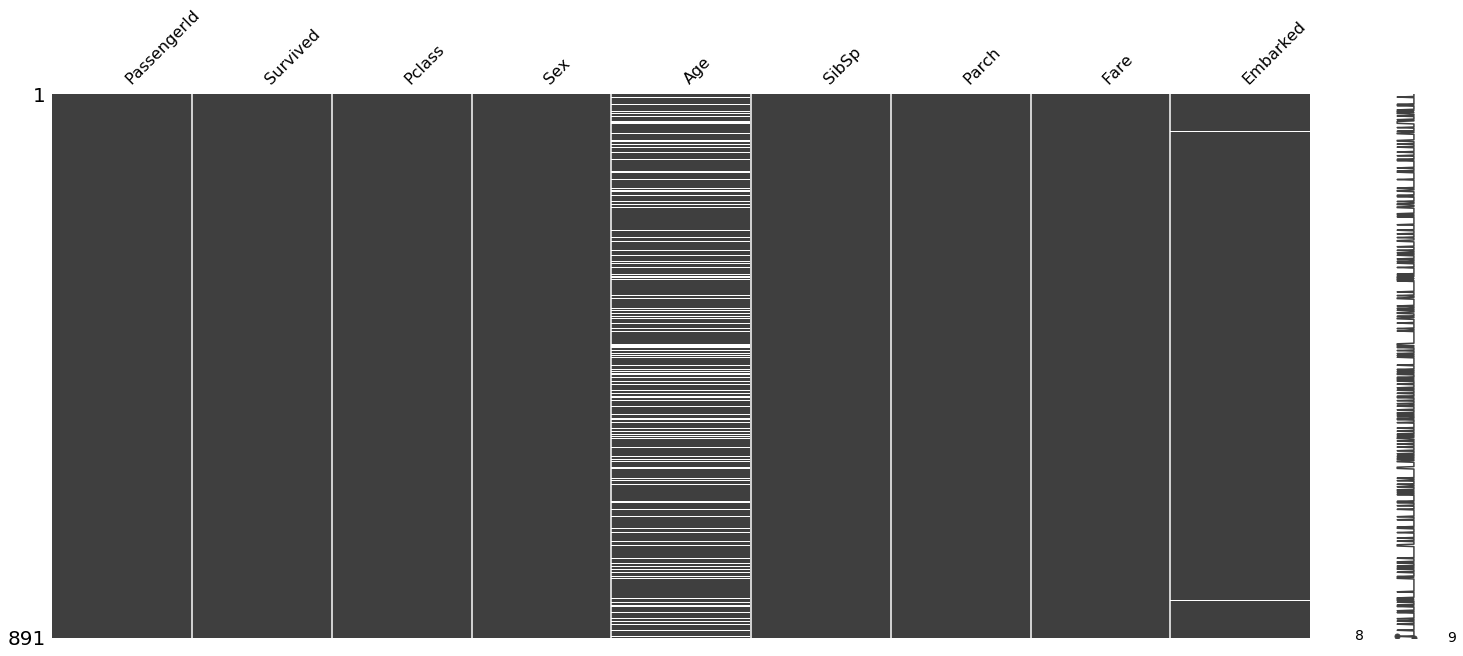

In [24]:
ms.matrix(data)

In [25]:
data.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [26]:
def add(cols):
    age = cols[0]
    Pclass = cols[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 37.0
        elif Pclass == 2:
            return 29.0
        else:
            return 24.0
    else:
        return age

In [27]:
data['Age'] = data[['Age','Pclass']].apply(add,axis=1)

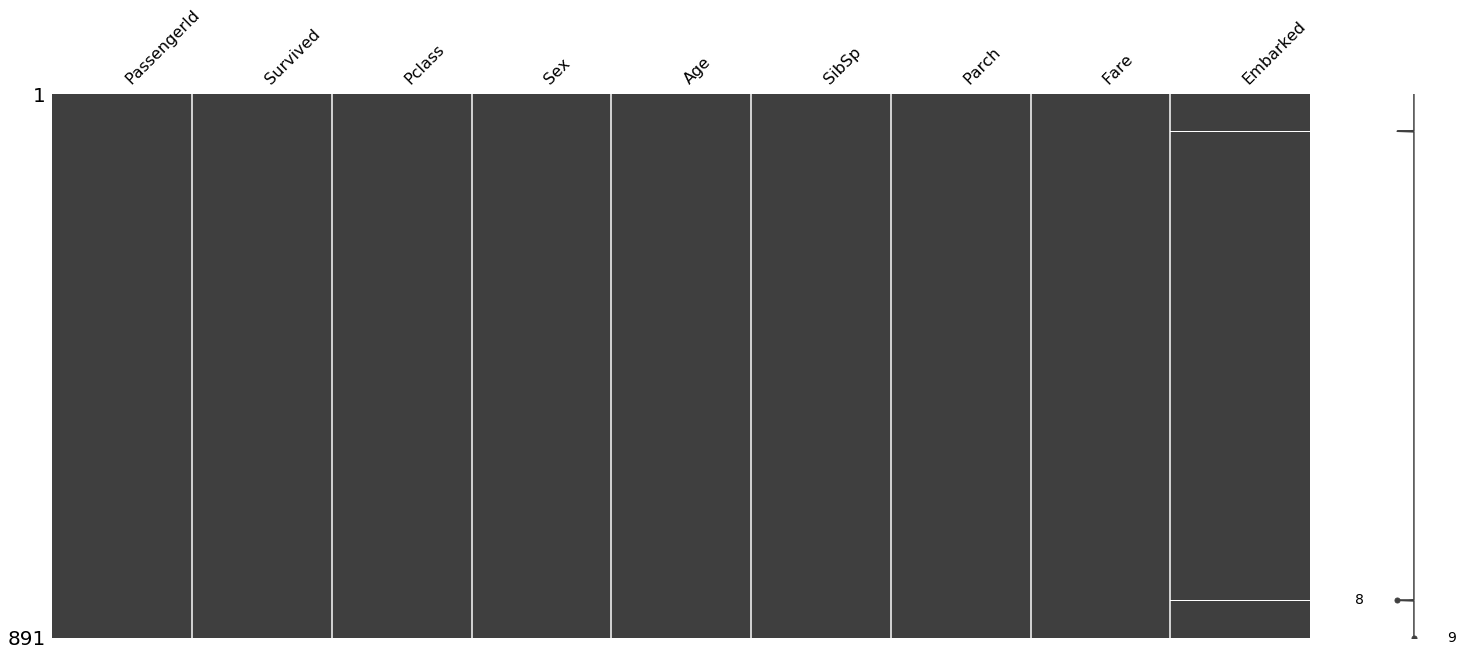

In [28]:
ms.matrix(data)

In [29]:
data.dropna(inplace = True)

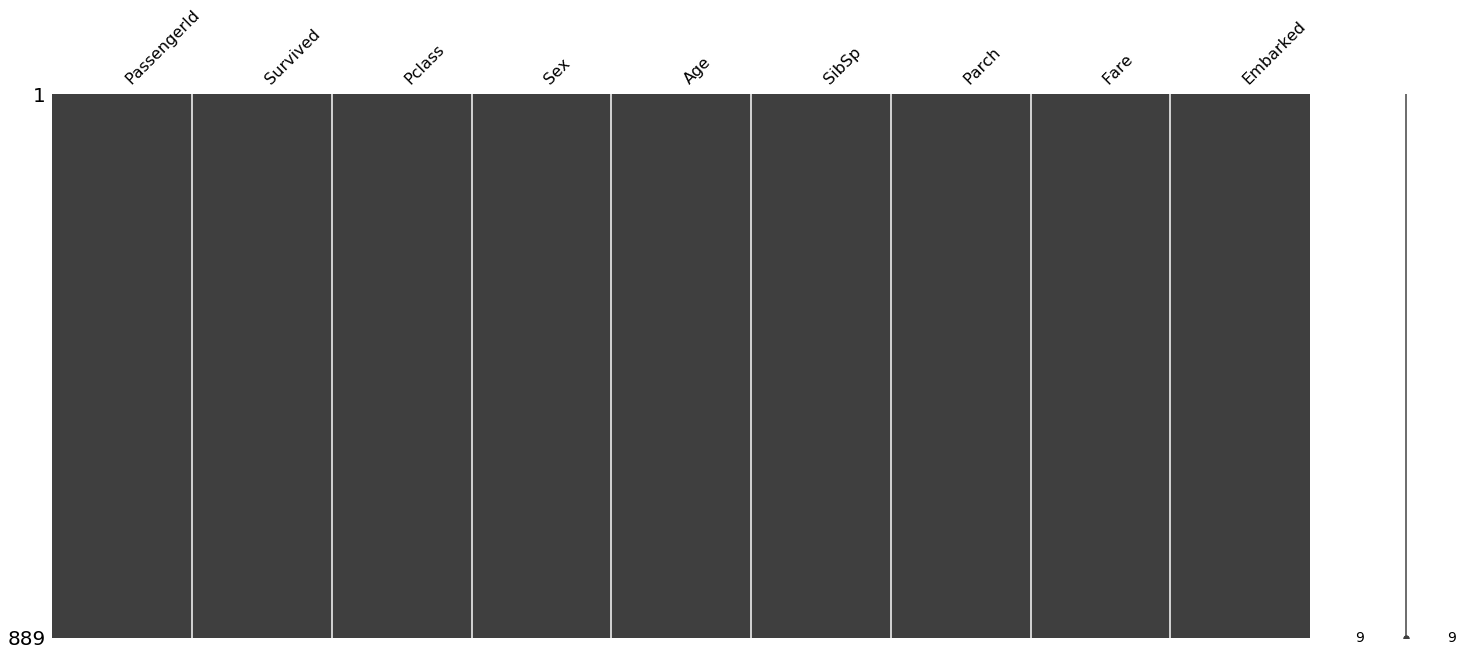

In [30]:
ms.matrix(data)

### Categorical Conversion

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [32]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [33]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Sex          889 non-null    object 
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2])],remainder='passthrough')
x = ct.fit_transform(x)

In [36]:
print(x[0])

[0.0 1.0 1 3 22.0 1 0 7.25 'S']


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-1])],remainder='passthrough')
x = ct.fit_transform(x)

In [38]:
print(x[0])

[0.0 0.0 1.0 0.0 1.0 1 3 22.0 1 0 7.25]


## train_test_split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [40]:
print(X_train)

[[0.0 0.0 1.0 ... 0 0 7.775]
 [0.0 0.0 1.0 ... 0 1 23.0]
 [0.0 0.0 1.0 ... 0 0 7.925]
 ...
 [0.0 0.0 1.0 ... 0 0 8.05]
 [1.0 0.0 0.0 ... 0 0 7.2292]
 [0.0 0.0 1.0 ... 0 0 13.0]]


In [41]:
print(Y_train)

807    0
651    1
2      1
690    1
196    0
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int64


In [42]:
print(X_test)

[[0.0 0.0 1.0 ... 0 0 8.05]
 [0.0 1.0 0.0 ... 0 0 7.75]
 [0.0 0.0 1.0 ... 1 2 65.0]
 ...
 [0.0 0.0 1.0 ... 0 0 0.0]
 [0.0 0.0 1.0 ... 1 0 52.0]
 [0.0 0.0 1.0 ... 3 2 27.9]]


In [43]:
print(Y_test)

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64


## Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
print(X_train)

[[-0.48133478 -0.30519808  0.61327497 ... -0.48408036 -0.46636808
  -0.48186308]
 [-0.48133478 -0.30519808  0.61327497 ... -0.48408036  0.76801892
  -0.18433094]
 [-0.48133478 -0.30519808  0.61327497 ... -0.48408036 -0.46636808
  -0.47893173]
 ...
 [-0.48133478 -0.30519808  0.61327497 ... -0.48408036 -0.46636808
  -0.47648894]
 [ 2.07755609 -0.30519808 -1.63058993 ... -0.48408036 -0.46636808
  -0.49252929]
 [-0.48133478 -0.30519808  0.61327497 ... -0.48408036 -0.46636808
  -0.37975435]]


In [46]:
print(X_test)

[[-0.48133478 -0.30519808  0.61327497 ... -0.48408036 -0.46636808
  -0.47648894]
 [-0.48133478  3.27656055 -1.63058993 ... -0.48408036 -0.46636808
  -0.48235164]
 [-0.48133478 -0.30519808  0.61327497 ...  0.43953309  2.00240591
   0.63644736]
 ...
 [-0.48133478 -0.30519808  0.61327497 ... -0.48408036 -0.46636808
  -0.63380478]
 [-0.48133478 -0.30519808  0.61327497 ...  0.43953309 -0.46636808
   0.38239693]
 [-0.48133478 -0.30519808  0.61327497 ...  2.28675998  2.00240591
  -0.08857348]]


### Training the dataset

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(metric='minkowski', n_neighbors=5, p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Predicting the test results

In [49]:
y_pred = classifier.predict(X_test)

### Results 

In [50]:
y_pred = np.array(y_pred)
Y_test = np.array(Y_test)

In [51]:
print(np.concatenate((Y_test.reshape(len(Y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]

In [52]:
print(classifier.predict(sc.transform([[0.0,0.0,1.0,0.0,1.0,1,3,22.0,1,0,7.25]])))

[0]


In [53]:
print(classifier.predict_proba(sc.transform([[0.0,0.0,1.0,0.0,1.0,1,3,22.0,1,0,7.25]])))

[[1. 0.]]


### Confusion_Matrix and Accuracy_Score

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("accuracy_score: ",accuracy_score(Y_test,y_pred))
print("confusion_matrix: ",confusion_matrix(Y_test,y_pred))

accuracy_score:  0.8202247191011236
confusion_matrix:  [[147  16]
 [ 32  72]]
